In [1]:
import drawsvg as dw
%load_ext jhmagics

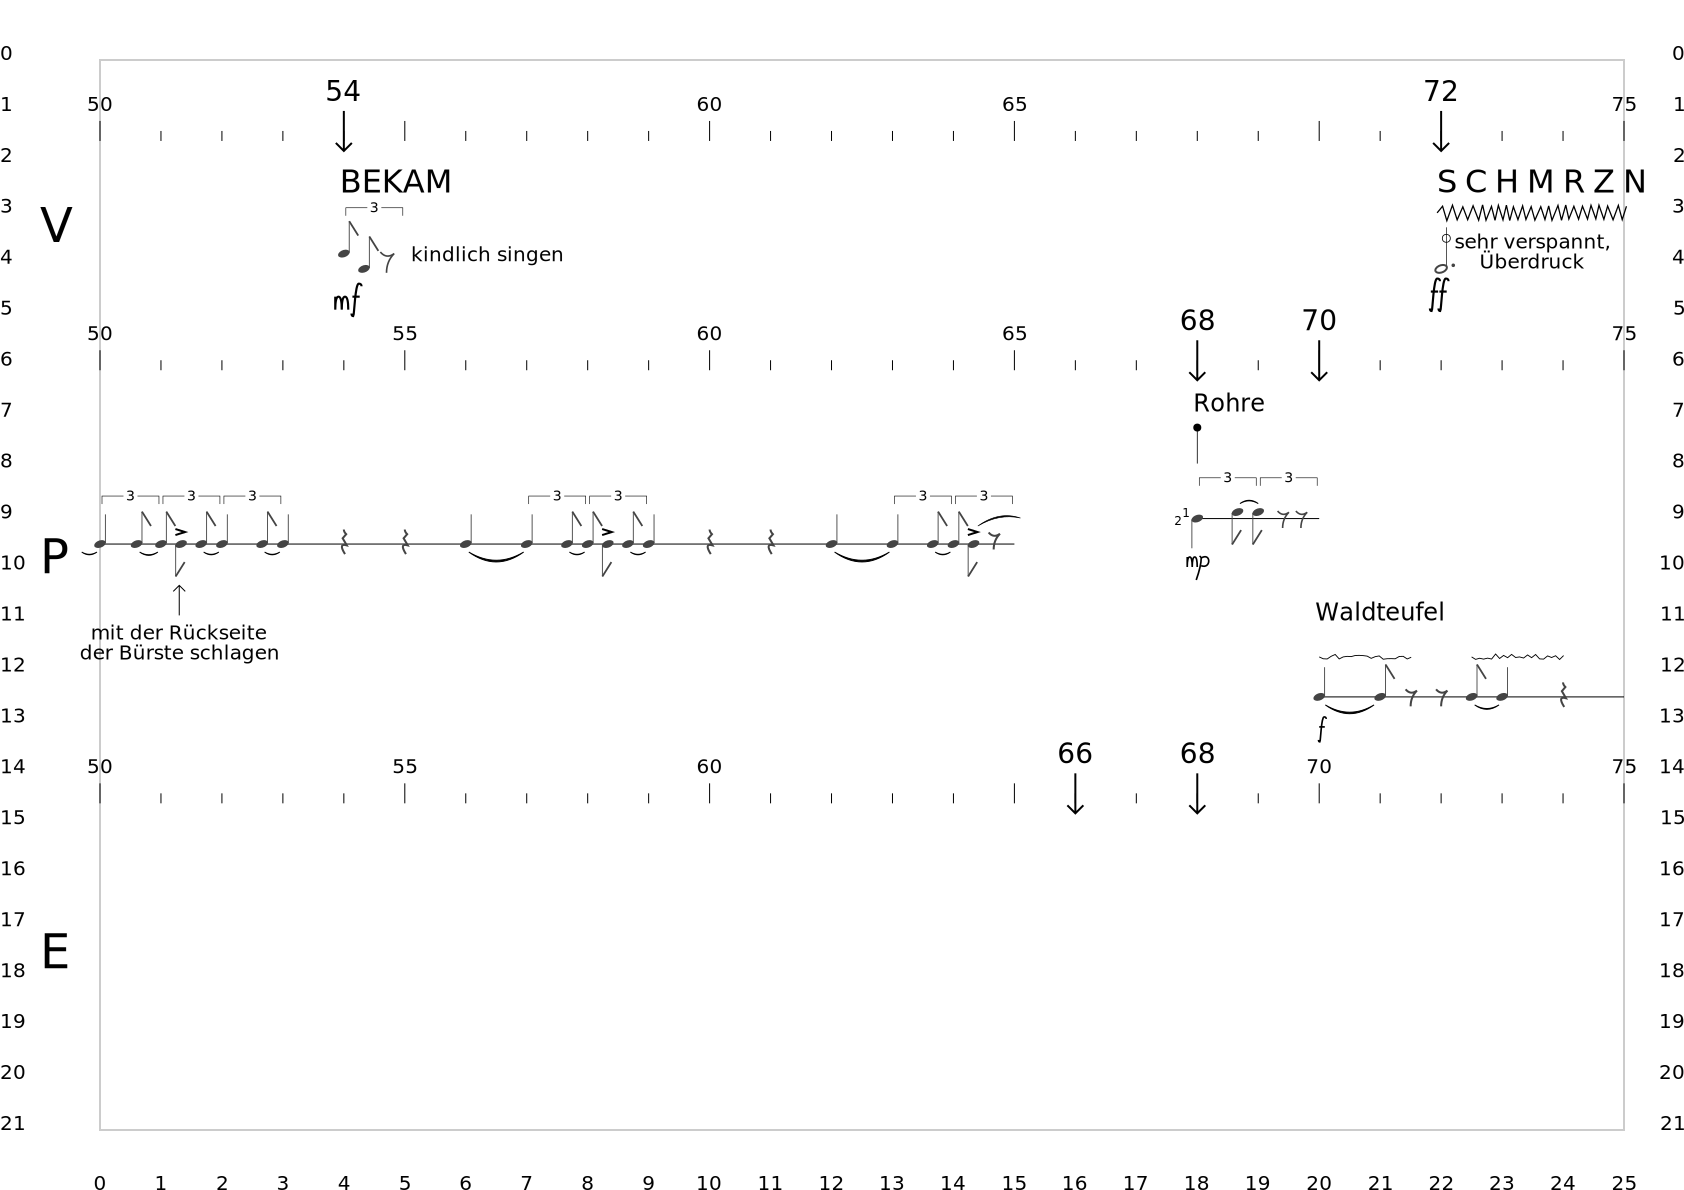

In [50]:
%%jh

w,h = 842,595
d = dw.Drawing(w,h,font_family='Simvoni')

# fonts: Simvoni für zahlen und text sprechstimme
#        Cantarell für musikalische anweisungen

# page settings
xnum,ynum = 26,22 # posts (= one more than divisions)
mleft,mright,mtop,mbot = 50,30,30,30
xsize,ysize = w-mleft-mright,h-mtop-mbot
xunit,yunit = xsize / (xnum-1),ysize / (ynum-1)

# load own functions
from os import listdir
dir = '/home/jh/src/svg/lib'
files = listdir(dir)
for file in files:
    if file[-3:] == '.py':
        f = '%s/%s' % (dir,file)
        exec(open(f).read())

# custom functions for xgrid and ygrid for this page
def xg(indx):
    return xgrid(indx,tm0)
def yg(indx):
    return ygrid(indx)
    
# raster am rand zur orientierung
showGridOnMargins()
showWritingSpace()

# zeitleisten und instrumente links
tm0 = 50  # zeit am anfang dieser seite
off = 15 # offset für die striche
 # normale zahlen in V P E
norm = [[50,60,65,75],[50,55,60,65,75],[50,55,60,70,75]]
 # events in V P E
event = [[54,72],[68,70],[66,68]]
 # ygrid positionen für die leisten
yleisten = [1,5.5,14]
 # instrumente 
insnamen = ['V','P','E']
ytimeplus = [*yleisten,ynum-1]
yposinsnamen = [ytimeplus[i]+(ytimeplus[i+1]-ytimeplus[i])/2 for i in range(3)]
 # write out
for l in range(3):
    y = ygrid(yleisten[l])
    text(insnamen[l],xgrid(0)-30,ygrid(yposinsnamen[l]),24,dominant_baseline='middle')
    for i in range(xnum):
        x = xgrid(i)
        if i%5==0: vline(x,y+off,-10,sw=.5)
        else: vline(x,y+off,-5,sw=.5)
        if (i+tm0) in norm[l]:
            text('%d'%(i+tm0),x,y,10,text_anchor='middle')
        elif (i+tm0) in event[l]:
            text('%d'%(i+tm0),x,y-5,14,text_anchor='middle')
            arrow(x,y,20,4)

# noten und pausen und dynamik größe
notsiz = 4.5
nothals = 1.2
pausiz = 4.5
dynsiz = 10

            
################# VOICE #################

 # bekam
x = xg(54)
ygindxvtop = yleisten[0]+.8
ygindxtext = ygindxvtop+.8 #text basline
text('BEKAM',x-2,yg(ygindxtext),16)
not8tel(x,yg(ygindxvtop+2),nothals,notsiz)
not8tel(xg(54.33),yg(ygindxvtop+2.3),nothals,notsiz)
paus8tel(xg(54.7),yg(ygindxvtop+2.15),pausiz+1)
yy = yg(ygindxtext+.3)
nlets(x,yy,xg(55),yy)
text('kindlich singen',xg(55.1),ygrid(ygindxvtop+2.15),10,font_family='Cantarell Light',font_style='italic')
mezzoforte(x,yg(ygindxtext+2.3),13)

 # schmrzn
x = xg(72)
text('SCHMRZN',x-2,yg(ygindxtext),16,letter_spacing=4)
krackelinie(x-2,yg(ygindxtext+.4),xg(75),yg(ygindxtext+.5),swfac=.8)
not2tel(x,yg(ygindxtext+1.5),nothals*1.5,notsiz,dotted=1,dotspace=1.5,dotsiz=1.2)
circ(x+2.6,yg(ygindxtext+.9),r=2,swfac=2,fill='none')
text(['sehr verspannt,','Überdruck'],xg(73.5),ygrid(ygindxtext+1.1),10,
     font_family='Cantarell Light',font_style='italic',text_anchor='middle')
fortissimo(x-3,yg(ygindxtext+2.2),13)


################# PERCUSSION #################

 # linien und instrumente
ypercindx = yleisten[1]
ylinientm = ypercindx+4
ylinienmp = ypercindx+3.5
ylinienwt = ypercindx+7
startends = [50,65,68,70,70,75]
insnamen = ['','Rohre','Waldteufel']
yoffsetins = [2,2.1,1.5] #abstand der namen von den linien
for i,yl in enumerate([ylinientm,ylinienmp,ylinienwt]):
    y = yg(yl)
    x1 = xg(startends[i*2])
    x2 = xg(startends[i*2+1])
    line(x1,y,x2,y,stroke_width=0.5)
    text(insnamen[i],x1-2,yg(yl-yoffsetins[i]),12,font_family='Cantarell')
    if i==1: 
        text('1',x1-4,y-3,6,font_family='Cantarell',text_anchor='end',dominant_baseline='middle')
        text('2',x1-8,y+1,6,font_family='Cantarell',text_anchor='end',dominant_baseline='middle')
        percHardMallet(x1,yg(yl-yoffsetins[i])+8,prop=9)

 # tamtam
y = yg(ylinientm)
yy = y+4
  # 1
not4tel(xg(50),y,nothals,notsiz)
tie(xg(49.7),yy,xg(49.95),yy,1.5,.5)
not8tel(xg(50.6),y,nothals,notsiz)
tie(xg(50.65),yy,xg(50.95),yy,1.5,.5)
not8tel(xg(51),y,nothals,notsiz)
not8tel(xg(51.33),y,-nothals,notsiz)
accent(xg(51.3),y-6,6)
not8tel(xg(51.66),y,nothals,notsiz)
tie(xg(51.7),yy,xg(51.95),yy,1.5,.5)
not4tel(xg(52),y,nothals,notsiz)
not8tel(xg(52.66),y,nothals,notsiz)
tie(xg(52.7),yy,xg(52.95),yy,1.5,.5)
not4tel(xg(53),y,nothals,notsiz)
paus4tel(xg(54),y-2,pausiz,1.5)
paus4tel(xg(55),y-2,pausiz,1.5)
  # 2
not4tel(xg(56),y,nothals,notsiz)
tie(xg(56.05),yy,xg(56.95),yy,1.5,.5)
not4tel(xg(57),y,nothals,notsiz)
not8tel(xg(57.66),y,nothals,notsiz)
tie(xg(57.7),yy,xg(57.95),yy,1.5,.5)
not8tel(xg(58),y,nothals,notsiz)
not8tel(xg(58.33),y,-nothals,notsiz)
accent(xg(58.3),y-6,6)
not8tel(xg(58.66),y,nothals,notsiz)
tie(xg(58.7),yy,xg(58.95),yy,1.5,.5)
not4tel(xg(59),y,nothals,notsiz)
paus4tel(xg(60),y-2,pausiz,1.5)
paus4tel(xg(61),y-2,pausiz,1.5)
  # 3
not4tel(xg(62),y,nothals,notsiz)
tie(xg(62.05),yy,xg(62.95),yy,1.5,.5)
not4tel(xg(63),y,nothals,notsiz)
not8tel(xg(63.66),y,nothals,notsiz)
tie(xg(63.7),yy,xg(63.95),yy,1.5,.5)
not8tel(xg(64),y,nothals,notsiz)
not8tel(xg(64.33),y,-nothals,notsiz)
accent(xg(64.3),y-6,6)
tie(xg(64.4),y-9,xg(65.1),y-13,-1.5,.3)
paus8tel(xg(64.66),y-2,pausiz,1.5)
  # triolen und erklärung
yyy = y-24
nlets(xg(50),yyy,xg(51),yyy,num=3)
nlets(xg(57),yyy,xg(58),yyy,num=2)
nlets(xg(63),yyy,xg(64),yyy,num=2)
arrow(xg(51.3),y+yunit*1.4,15,3,rot=180,sw=.5)
text(['mit der Rückseite','der Bürste schlagen'],xg(51.3),y+yunit*1.5,10,
     font_family='Cantarell Light',font_style='italic',text_anchor='middle',dominant_baseline='hanging')


 # rohre
not4tel(xg(68),yg(ylinienmp),-nothals,notsiz)
not8tel(xg(68.66),yg(ylinienmp)-notsiz/2-1,-nothals,notsiz)
tie(xg(68.7),yg(ylinienmp)-notsiz-3,xg(69),yg(ylinienmp)-notsiz-3,-1.5,.5)
not8tel(xg(69),yg(ylinienmp)-notsiz/2-1,-nothals,notsiz)
paus8tel(xg(69.4),yg(ylinienmp),pausiz,swfac=1.2)
paus8tel(xg(69.7),yg(ylinienmp),pausiz,swfac=1.2)
yy = yg(ylinienmp-.8)
nlets(xg(68),yy,xg(69),yy,2)
mezzopiano(xg(67.95),yg(ylinienmp+.95),dynsiz)
    
 # waldteufel
y = yg(ylinienwt)
yy = y+4
not4tel(xg(70),y,nothals,notsiz)
forte(xg(70),y+20,dynsiz)
tie(xg(70.1),yy,xg(70.9),yy,1.5,.5)
not8tel(xg(71),y,nothals,notsiz)
yyy = y-20
kratzgliss(xg(70),yyy,xg(71.5),yyy,1.5,1.5,2)
paus8tel(xg(71.5),y,pausiz,1.5)
paus8tel(xg(72),y,pausiz,1.5)
not8tel(xg(72.5),y,nothals,notsiz)
tie(xg(72.55),yy,xg(72.95),yy,1.5,.5)
not4tel(xg(73),y,nothals,notsiz)
kratzgliss(xg(72.5),yyy,xg(74),yyy,1.5,1.5,2)
paus4tel(xg(74),y-2,pausiz,1.5)

################# ELEKTRONIK #################



d.set_pixel_scale(2)
#d.save_png('partitur_03.png')
#d.save_svg('partitur_03.svg')
d

In [30]:
help(arrow)

Help on function arrow in module __main__:

arrow(x=10, y=10, l=30, w=8, rot=0, c='black', sw=1, **args)
    simple arrow. rot=0 means downwards

